In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions

In [18]:
dataset = pd.read_csv("Social_Network_Ads.csv")

In [11]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [12]:
new_dataset = dataset.drop("User ID", axis=1)
new_dataset

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [70]:
from sklearn.preprocessing import OneHotEncoder

In [71]:
ohe = OneHotEncoder(drop= "first")

In [72]:
new_dataset["Gender"] = ohe.fit_transform(new_dataset[["Gender"]]).toarray()
new_dataset

,Gender,Age,EstimatedSalary,Purchased
0,1.0,19,19000,0
1,1.0,35,20000,0
2,0.0,26,43000,0
3,0.0,27,57000,0
4,1.0,19,76000,0
...,...,...,...,...
395,0.0,46,41000,1
396,1.0,51,23000,1
397,0.0,50,20000,1
398,1.0,36,33000,0


In [84]:
new_dataset.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

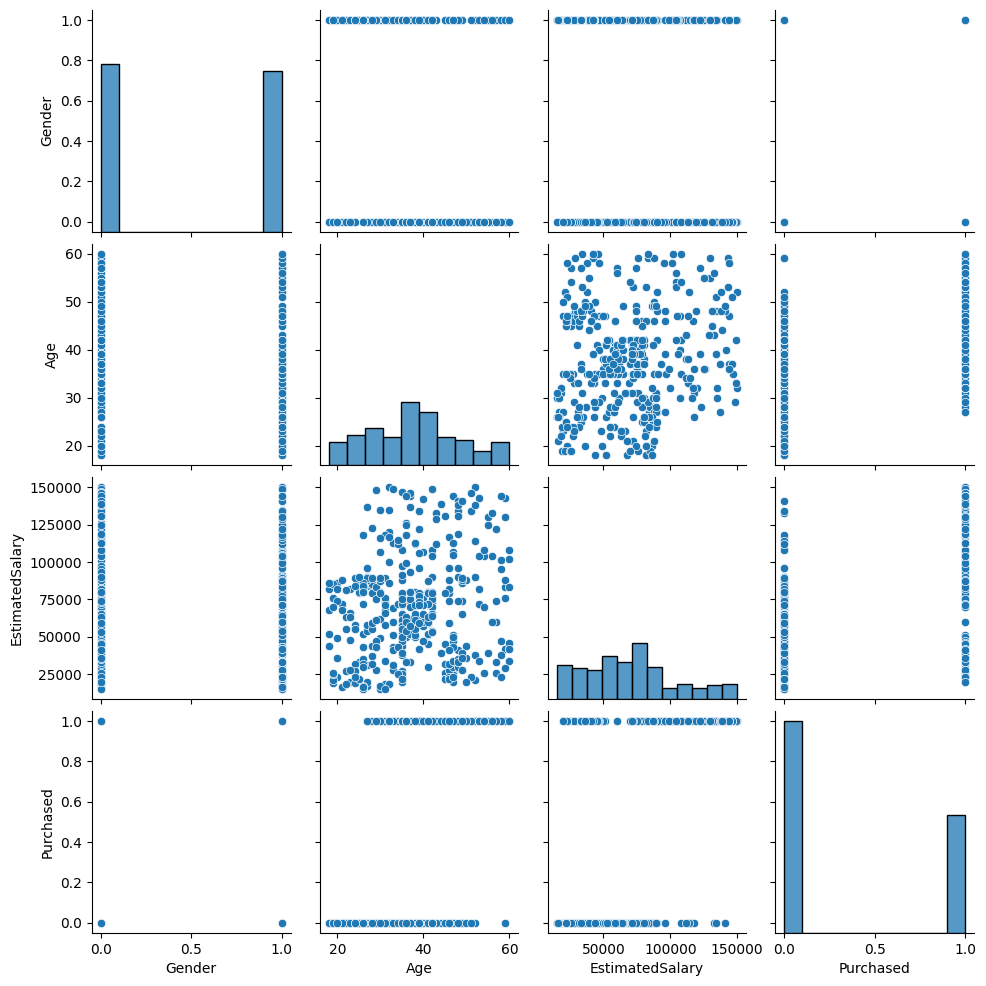

In [105]:
sns.pairplot(new_dataset)
plt.show()

In [213]:
x = new_dataset[["Age",	"EstimatedSalary"]] 
y = new_dataset["Purchased"]


In [214]:
Ss = StandardScaler()

In [215]:
Ss.fit(x)

StandardScaler()

In [216]:
x = pd.DataFrame(Ss.transform(x), columns=x.columns)

In [233]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=42)
X_train.shape

(320, 2)

In [234]:
from sklearn.tree import DecisionTreeClassifier

In [235]:
DTC = DecisionTreeClassifier(max_depth=5)
DTC.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [236]:
DTC1 = DecisionTreeClassifier(criterion= "entropy")
DTC1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [237]:
DTC.score(X_test,y_test)*100

90.0

In [238]:
DTC1.score(X_test,y_test)*100

83.75

In [239]:
DTC.predict([[36, 33000]])

C:\Users\Anshil\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

C:\Users\Anshil\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


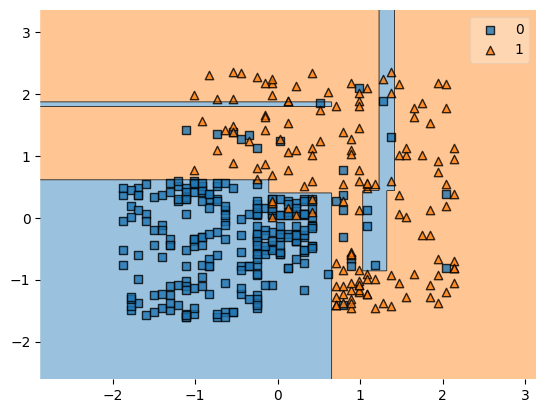

In [240]:
plot_decision_regions(x.to_numpy(), y.to_numpy(),clf=DTC)
plt.show()



In [241]:
from sklearn.tree import plot_tree

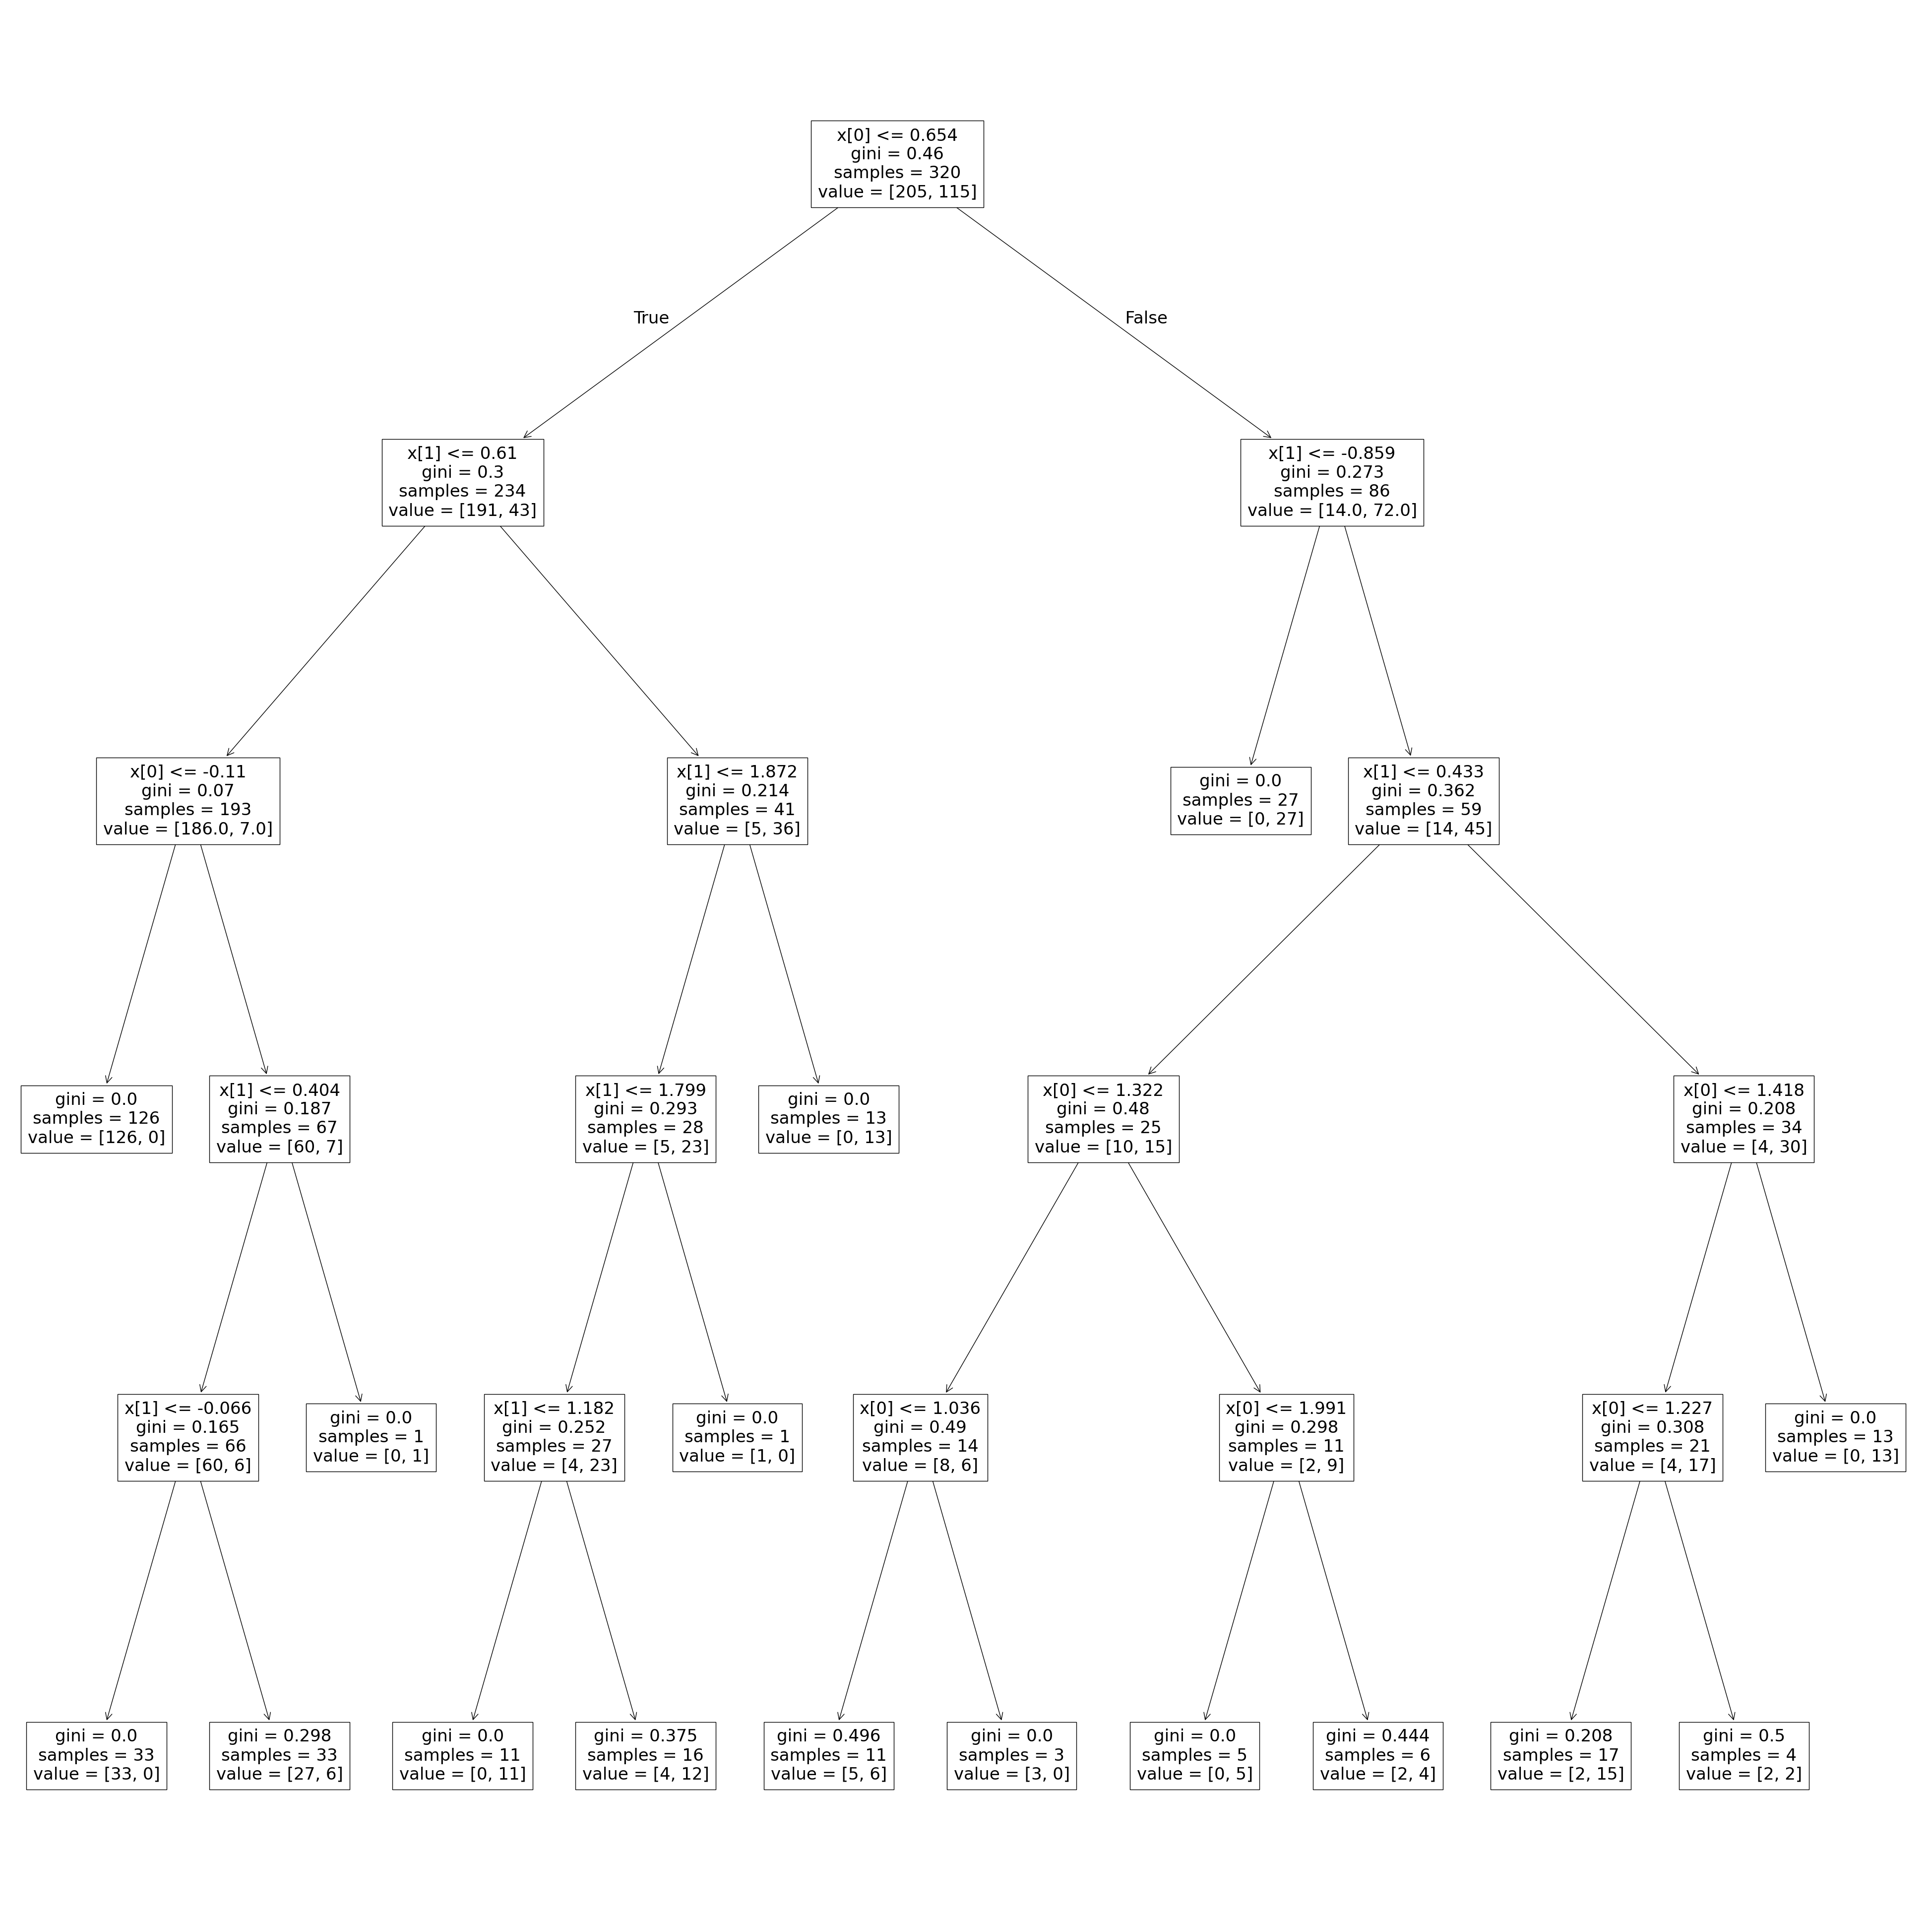

In [242]:
plt.figure(figsize=(50,50))
plot_tree(DTC)
plt.savefig("Tree2.jpg")
plt.show()